<div><span style="background-color: #222222; padding-top: 10px; padding-right: 10px; padding-bottom: 10px; padding-left: 10px; color: #F4EAD2; font-size: 17px; font-weight: bold">Classifying Condominiums having High and Low Price/Area Value using Google Street Images</span></div>

### by: Ralph Roland T. Caubalejo

**Packages/Libraries Used**

In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam, SGD,RMSprop

from skimage.io import imread,imshow
from skimage.transform import rotate
from tqdm import tqdm

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">INTRODUCTION</span></div>

<p style="text-align: justify">One of the most lucrative business in the Philippines is the Real Estate Sector.  We can see that that during the past years we have experience a sudden increase in real estate properties with the rise of many High-Rise residential Condominiums. Many Real Estate companies has been on the rise like SMDC, EPMC, Cityland and many more Real Estate Players. Lot of Big Companies are also making their own property management group so that they can have a market share on real estate boom. High Rise Residential Condominiums are usually situated in the business district like Makati City and Ortigas. During the past year, there is also an increase of condominium constructions in Bay Area specially in Pasay due to the rise of casinos in that area. Due to this, a sudden influx of prices in the real estate business is seen.</p>

<p style="text-align: justify">Wtih Reference to my Machine Learning 1 Project where we conducted machine learning processes to predict the price value of a condonimium unit using the data scraped from lamudi.ph, for this project We will be using the scraped data to check for new inspiration  to help the Real Estate Industry.</p>

<p style="text-align: justify">With this at hand, it would be beneficial if we can have Deep Learning model that can predict the Condominium Prices just based on the Images from its surrounding environment like roads,malls and the likes. This will prove to be beneficial to a lot of business sectors specially those directly doing business in the real estate sector.</p>

<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">PROBLEM STATEMENT</span></div>

## Can we classify Condominium/Condominium Building if they have a High or Low Price/Area Value using Images from its surrounding?

<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">BUSINESS VALUE/HIGHLIGHTS</span></div>

The study was able to have an accuracy of **71%** of classifying a Condominium Building having a Low or High Price/Area Value.

There are different highlights for this study, but the most important is that the model can help:

- **Real Estate Companies**: Companies can use images on the surrounding area to estimate building value


- **Real Estate Agents/Sellers**: Agents can easily check if the building/condominium is high or low based on an image outside


- **Real Estate Buyers**: Buyers can access if the price of the Unit is reasonable


- **Mass Public**: Better Understanding of Condominiums


<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">METHODOLOGY/DATA SOURCES</span></div>

<p style="text-align: justify">To properly address the problem, we will be needing images on the specific coordinates on different condominiums in metro manila. Note that there is a wide array of selection for possible collection of data but one of the most interesting point of reference are the information on the different real estate websites. For this study, we will be using the a scraped data from lamudi.ph from Machine Learning 1 Project and also scraped images on Google Street Views. We will be following the general workflow defined below to arrive at a conclusion and recommendation:</p>

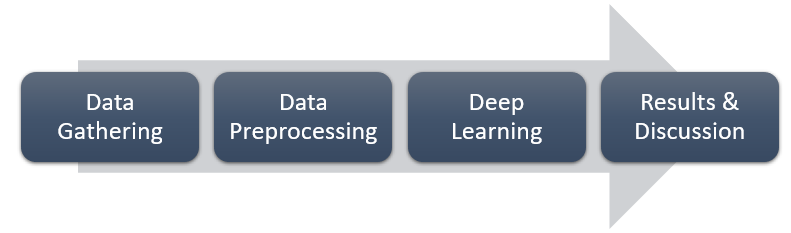

### OVERVIEW OF THE METHODOLOGY

Each step will be discussed in detail in the following sections. To give a general overview of the methodology, a brief description for each step is described below:

#### 1. Data Gathering

For this study, since we are scraped data from lamudi.ph in a Machine Learning 1. If you can remember, the file has the following data that will be used for this project. 

    a). Coordinates of the Building in Latitude and Longitude
    b). Price of Condominium Unit
    c). Area of Condominium Unit
    
Since we will focusing on scraping only the images on a specific coordinates, we will be only getting the unique coordinates of latitude and longitude. We will be only using the Price/Area Value as the target for this project since there are varying area and prices. This is to normalize the data and target.

We will be using the Coordinates from the lamudi.ph and parse it using Google Street View API. Using this API, we can get screen shots of the outdoor images for that specific coordinates. We will be getting several screen shots of in different degree views for 0 to 360 Degrees to have enough data.

    For this project, we used the following options in Google Street View API:
    
      * heading - Which is the Option where you can set the angle of screen shot with respect to the horizontal axis
      * fov - Which is the Option where you can choose how zoomed out or zoomed in the images is.
      * source - Which is the Option where you can choose to make sure that the image is an Outdoor Image.
      * Pitch - Which is the option you set to choose how tilted upwards the images is.
     
     For this project,the following option values were used:
      
      heading of ['0','20','40','60','80','100','120','140','160','180','200','220','240','260','280','300','320','340']
      fov of 120
      source of outdoor
      pitch of 25
      
      Note: You will be needing also an API Key to use Google Street View API

You can see some instruction also on how to use Google Street View here:
                https://developers.google.com/maps/documentation/streetview/overview

* A separate Jupyter Notebook is included with this study for the details of the Google Street View API scraping methods and programs used. (please see ML2-Scraping NB.ipynb) 

The Images will be stored in local directory and in JPEG File with size of 640 x 640 in 3 Color Channels.

#### 2. Data Preprocessing:
Since the images was scraped, there are different needed data cleaning to be done to ensure that all data can be used for the deep learning methods.

For this project we will be using different preprocessing methods to augment the data scraped, the techniques are as follows:

       a). Resizing the Images to size of (224,224,3)
       b). Normalizing the Images with unique mean and standard deviation
       c). Random Horizontal Flipping of Images
       d). Random Changing of Color Variation Using Color Jitter
       e). Random Perspective
       f). Random Affining of Images in different shear angles
       g). Random Rotation
       h). Random Erasing 
               A Unique technique to randomly erase certain pixels of blocks in the picture image. 
   
A Separate Notebook is included in this study that details all the programs and codes that was used to clean and preprocess the data. You can see also a sample function below in the Methodology Part.

#### 3. Deep Learning Models

Since we augmented our Training Data will several Data Augmentation Techniques, we will be extracting all the needed features from the images to be able to simplify the process. We will be using Different Pre-Trained Models to Feature Extract the images.

To Simply the Process, we will be only classifying the Images if it belongs a High Value of Price/Area or a Low Value Price/Area with the following Segmentation:

    Target:
        0 - Value is below or equals to Php 140,000/Area
        1 - Value is above Php 140,000/Area
        
The following process will be done for the Deep Learning Models to classify if it is Target 0 or 1:

    1. Training Images will be Preprocessed Using Different Augmentation Techniques at Random Probability
    2. Preprocessed Training Images will be parsed through Different Pre-Trained Models which are:
        a). VGG16
        b). VGG19
        c). Googlenet
        d). AlexNet
        e). Densenet
    3. Resulting Features will be parsed inputted in a Dense Layer of Neural Network to arrive on the Resulting Prediction.
    
To augment learning for this course, all the codes below in predicting the target will be done in **Pytorch** which is a deep learning library frequently used in the industry and observations will be shared.


#### 6. Results and Discussion

The Results of the Deep Learning Models will be explained and other challenges that were encountered.

Different Observations using Different Pre-Trained Models will also be shared.

Observations using Pytorch will also be shared.


## NOTE!!

This Report comes with two notebooks that is used for the scraping phase and also the different iteration between different pretrained models. The Name of the Notebook are as follows:

* ML2-Scraping NB
* ML2-Preprocess_Pretrained
    

<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">Data Preprocessing</span></div>

#### Loading the Names of the Images and the Corresponding Target Price/Area

In [11]:
df = pd.read_csv('target.csv').drop('Unnamed: 0',axis=1).set_index('names')
df.head()

,Php/Area
names,
0,170966.777774
2048,107142.857143
2,144146.354194
2051,228525.641026
4096,156811.892999


For this codes, we will be segmenting the data between Php 140,000 and assign a target of 0 and 1 it the value is below or above the Php 140,000/Area Value. This target will be then our target for classifying if the location will be classified as high value or low value place.

In [13]:
df4 = df.copy()
list_2 = []
        
for x,y in df4.iterrows():
    val = y.values[0]
    if val<140000:
        list_2.append(0)
    elif val>=140000:
        list_2.append(1)

df4['Class_2'] = list_2
df4.head(5)

,Php/Area,Class_2
names,,
0,170966.777774,1
2048,107142.857143,0
2,144146.354194,1
2051,228525.641026,1
4096,156811.892999,1


The Distribution of the Target are as follows and should have an accuracy that is at least 125% of the PCC Score.

Population per class:      0
1  514
0  483

1.25 * Proportion Chance Criterion: 62.560424503198654%


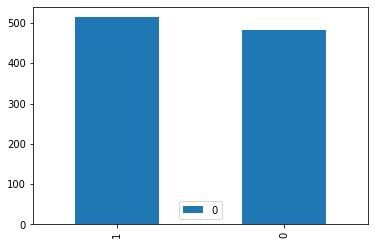

In [14]:
import numpy as np
from collections import Counter
state_counts = Counter(df4['Class_2'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2
print("Population per class: {}\n".format(df_state))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

For this Project, we will be using the Pytorch Library in building the Neural Network and we will be using also the GPU capability of Pytorch.

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print('Using Local Laptop GPU')

cuda:0
Using Local Laptop GPU


Since we took different angles for one specific coordinates, we have the chance to create a big dataset for this project. For generalization and before data augmenting the dataset. We will be already splitting the dataset in to train and test, and we will only use the data augmentation technique on the train set to make that our train set will not overfit and will be able to generalize well for data point/images that is outside the training set.

In [16]:
df_train, df_test, df_y_train, df_y_test = train_test_split(df4.index, 
                                                    df4['Class_2'], 
                                                    test_size=0.20,
                                                    stratify=df4['Class_2'],random_state=100)

In [17]:
df5 = df4.loc[df_train]
df6 = df4.loc[df_test]
print('Trainset Unique Locations \n',df5['Class_2'].value_counts())
print('Testset Unique Location\n',df6['Class_2'].value_counts())

Trainset Unique Locations 
 1    411
0    386
Name: Class_2, dtype: int64
Testset Unique Location
 1    103
0     97
Name: Class_2, dtype: int64


The Function below, will randomize the data augmentation techniques. The Pretrained models in pytorch have a recommended input options which images of size 224, 224 pixel with a specified mean and standard deviation. This is done when we use the preprocessing1 function option below. The other function will do other data transformation that are describe as follows:

* a) RandomHorizontalFlip - randomly flip the images horizontally with a desired probability
* b) ColorJitter - randomly change the brightness and the darkness of the image with the given floats
* c) Random Perspective - randomly change the perspective image with a desire probability of change
* d) Random Affine - randomly change the orientation and shear of the image depending on the angle inputted
* e) Random Erasing - randomly erase pixel blocks inside the image for better generalization

In [18]:
def prepro(img,num):
    """img - array of any size
       num - desired preprocessing scheme"""
    
    preprocess1 = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    preprocess2 = transforms.Compose([
        transforms.Resize(224),
        transforms.RandomHorizontalFlip(0.5),
        transforms.ColorJitter(1,2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.RandomErasing()])

    preprocess3 = transforms.Compose([
        transforms.Resize(224),
        transforms.RandomPerspective(fill=200),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.RandomErasing()])
    
    preprocess4 = transforms.Compose([
        transforms.Resize(224),
        transforms.RandomAffine(180,shear=30,fillcolor=125),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.RandomErasing()])
    
    preprocess5 = transforms.Compose([
        transforms.Resize(224),
        transforms.RandomAffine(180,shear=30,fillcolor=125),
        transforms.RandomPerspective(fill=200),
        transforms.RandomHorizontalFlip(0.5),
        transforms.ColorJitter(1,2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.RandomErasing()])
    
    preprocess6 = transforms.Compose([
        transforms.Resize(224),
        transforms.ColorJitter(1,2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.RandomErasing()])
    
    preprocess7 = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.RandomErasing()])
    
    if num==1:
        return preprocess1(img)
    elif num==2:
        return preprocess2(img)
    elif num==3:
        return preprocess3(img)
    elif num==4:
        return preprocess4(img)
    elif num==5:
        return preprocess5(img)
    elif num==6:
        return preprocess6(img)
    elif num==7:
        return preprocess7(img)

<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">Pre-Trained Neural Networks</span></div>

For this project, we will try to compare also the accuracy of the pretrained models by using different pre-trained models and comparing the results. The pretrained models that will be used for this project are as follows:

* VGG16
* VGG19
* MNASNET
* DENSENET121
* SQUEEZENET
* SHUFFLENET
* MOBILENET
* ALEXNET

A separete Notebook entitle ML2_Preprocess_PreTrained what used to extract the features on the image on each of this pretrained models. For simplicity, we will only only load the features generated since it took around few days to extract the features on each model. A Sample feature extraction is also shown below using alexnet pre-trained model.

In [19]:
#load the pretrained models
model1 = models.alexnet(pretrained=True)
model1.to(device)
for param in model1.parameters():
    param.requires_grad = False

Just visualizing the Images before preprocessing and for Context

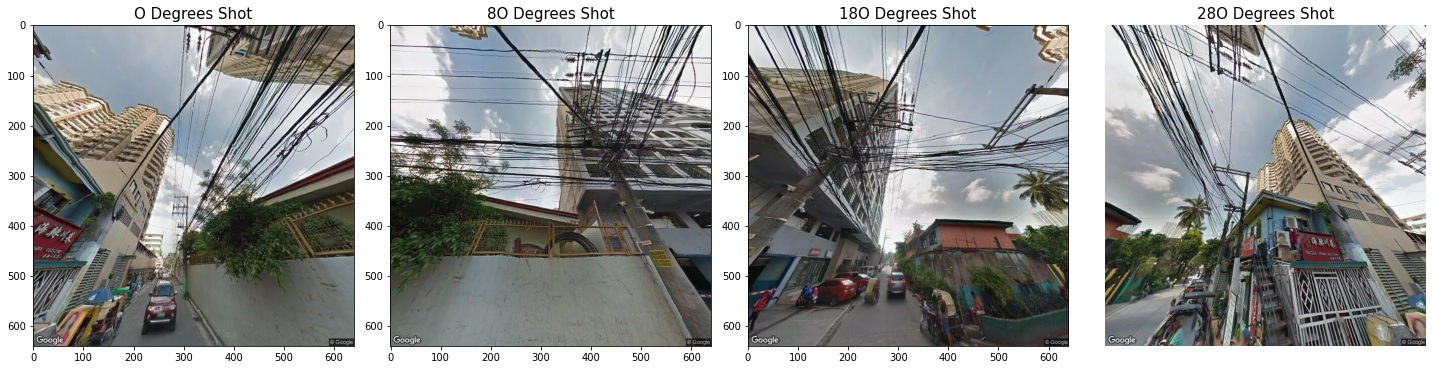

In [20]:
fig,ax =plt.subplots(1,4,figsize=(20,5))
ax[0].imshow(imread('images_2/0_0.jpg'))
ax[1].imshow(imread('images_2/0_80.jpg'))
ax[2].imshow(imread('images_2/0_180.jpg'))
ax[3].imshow(imread('images_2/0_280.jpg'))
ax[0].set_title('O Degrees Shot',fontsize=15)
ax[1].set_title('8O Degrees Shot',fontsize=15)
ax[2].set_title('18O Degrees Shot',fontsize=15)
ax[3].set_title('28O Degrees Shot',fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
# pytorch pretrained models should preprocess first to required size before inputting in the pretrained
new = prepro(Image.fromarray(imread('images_2/0_0.jpg')),1)
new.shape

torch.Size([3, 224, 224])

In [22]:
#to determine initial size of the array, let try one image feature extraction
shape1 = model1.features(new.unsqueeze(0).to(device)).shape
shape1

torch.Size([1, 256, 6, 6])

In [23]:
#to conserve memory ram, we will creating an empty array with the required size were the features will be inputted in the cell
var1=1
var2=1
final_data_train = np.empty((len(df5)*18*var1*var2,shape1[1]*shape1[2]*shape1[3]),dtype=np.float32)
final_data_train.nbytes

528850944

**Creating the Trainset and Saving in to a local NPZ File**

In [24]:
two = []
area = []
count = 0

headings = ['0','20','40','60','80','100','120','140','160',
            '180','200','220','240','260','280','300','320','340']

rot = [0,90,180,270]

with tqdm(total=len(df5)*18*var1*var2) as pbar:
    for x,y in df5.iterrows():
        for ang in headings:
            for rota in rot[:var1]:
                for pre in range(1,var2+1):
                    aws = (imread('images_2/'+str(x)+'_'+str(ang)+'.jpg'))
                    rotated = rotate(aws,rota,preserve_range=True).astype(np.uint8)
                    input_image = Image.fromarray(rotated)
                    input_tensor = prepro(input_image,pre)
                    input_batch = input_tensor.unsqueeze(0) 

                    features =  model1.features(input_batch.to(device))
                    features2 = np.reshape(features.cpu(),(1,shape1[1]*shape1[2]*shape1[3]))

                    final_data_train[count,...]=features2.cpu()

                    two.append(y['Class_2'])
                    area.append(y['Php/Area'])


                    count +=1

                    pbar.update(1)
                    
two_a = np.array(two)
area_a = np.array(area)
np.savez_compressed('alexfinal_train.npz',final_data_train,two_a,area_a)

100%|██████████| 14346/14346 [23:22<00:00, 10.23it/s]


**Creating a Testfile and Saving it into NPZ File**

In [25]:
final_data_test = np.empty((len(df6)*18,shape1[1]*shape1[2]*shape1[3]),dtype=np.float32)
final_data_test.nbytes

two_b = []
area_b = []
count = 0

headings = ['0','20','40','60','80','100','120','140','160',
            '180','200','220','240','260','280','300','320','340']


with tqdm(total=len(df6)*18) as pbar:
    for x,y in df6.iterrows():
        for ang in headings:
            aws = (imread('images_2/'+str(x)+'_'+str(ang)+'.jpg'))
            rotated = rotate(aws,0,preserve_range=True).astype(np.uint8)
            input_image = Image.fromarray(rotated)
            input_tensor = prepro(input_image,1)
            input_batch = input_tensor.unsqueeze(0) 

            features =  model1.features(input_batch.to(device))
            features2 = np.reshape(features.cpu(),(1,shape1[1]*shape1[2]*shape1[3]))

            final_data_test[count,...]=features2.cpu()

            two_b.append(y['Class_2'])
            area_b.append(y['Php/Area'])
            count +=1

            pbar.update(1)

two_b = np.array(two_b)
area_b = np.array(area_b)
np.savez_compressed('alexfinal_test.npz',final_data_test,two_b,area_b)

100%|██████████| 3600/3600 [06:14<00:00,  9.60it/s]


#### Loading the Trainset and Testset NPZ File

In [58]:
X_train = (np.load('alexfinal_train.npz')['arr_0'])
y_train = np.load('alexfinal_train.npz')['arr_1']
X_test = (np.load('alexfinal_test.npz')['arr_0'])
y_test = np.load('alexfinal_test.npz')['arr_1']

In [59]:
print('Trainset Shape: ',X_train.shape)
print('Trainset Target Shape: ',y_train.shape)
print('Testset Shape: ',X_test.shape)
print('Testset Target Shape: ',y_test.shape)

Trainset Shape:  (14346, 9216)
Trainset Target Shape:  (14346,)
Testset Shape:  (3600, 9216)
Testset Target Shape:  (3600,)


Since we have two classes we will change the target for the train and test test two categories with binary coding for easier interpretation and accuracy checking.

In [60]:
y_train = to_categorical(np.reshape(y_train,(y_train.shape[0],1)))
print('New Target Train shape: ',y_train.shape)

y_test = to_categorical(np.reshape(y_test,(y_test.shape[0],1)))
print('New Target Test shape: ',y_test.shape)

New Target Train shape:  (14346, 2)
New Target Test shape:  (3600, 2)


In [61]:
# A Function that will set the parameters and the target in two, this is a common thing to Pytorch Implementation
class ClassifierDataset(Dataset):
    # a class to split create a dataset table
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

# we will be inputting the train and test test in to this function

train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [62]:
# some set to check the accuracy and loss states after training
accuracy_stats = {'train': [],"val": []}
loss_stats = {'train': [],"val": []}

<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">DEEP LEARNING MODELS</span></div>

Since we already have our features we will be using those features pass it through a neural network of dense layers which will two outputs, either 0 or 1.

In [63]:
# pytorch also has data loaders like in keras but it is easier it to do in pytorch
train_loader = DataLoader(dataset=train_dataset,batch_size=100,shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=10,shuffle=True)

In [64]:
#initializing the dense layers with relu functions and last activation of sigmoid.
model = torch.nn.Sequential(
        torch.nn.Linear(X_train.shape[1], 128),
        torch.nn.Tanh(),
        torch.nn.Dropout(0.8),
        torch.nn.Linear(128, 2),
        torch.nn.Sigmoid()
)
model.to(device) # passing it to the GPU to process

Sequential(
  (0): Linear(in_features=9216, out_features=128, bias=True)
  (1): Tanh()
  (2): Dropout(p=0.8, inplace=False)
  (3): Linear(in_features=128, out_features=2, bias=True)
  (4): Sigmoid()
)

Pytorch Library is used by a lot of people due to the ease of use of different accuracy metrics, the function below, will already generate the accuracy score with using sklearn metrics. In keras, this is quite hard to do.

In [65]:
def multi_acc(y_pred, y_test):
    
    true = np.argmax(y_test.cpu().detach().numpy(),1)
    pred = np.argmax(y_pred.cpu().detach().numpy(),1)
    
    acc = accuracy_score(true, pred)
    
    return acc

In [66]:
#setting up the criterion for the loss
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

In Pytorch, you create the looping for the weight change and epoch change which is initalized bu the .zero_grad and .backward and .step method. This is similar to keras but it is just automated in keras. In this way, you can actually already for see that is happening on the model.

The for loop system below shows how it is done in pytorch

We will show the Alexnet using the alexnet features, for the other models, we will just load the models that was created the other notebook in the project for simplicity. Sample Iteration are as follows:

In [67]:
#initializing some parameters
EPOCHS = 100

print("Begin training.")
for e in (range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0 # for loss tracking
    train_epoch_acc = 0 #for acc traking
    model.train()
    
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch.float())
        train_acc = multi_acc(y_train_pred, y_train_batch.float())
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred,y_val_batch.float())
            val_acc = multi_acc(y_val_pred, y_val_batch.float())

            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
            
            
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    if (e%10)==0:
        print('Epoch',e,'Train Loss:',(train_epoch_loss/len(train_loader)),
                  'Val Loss:',(val_epoch_loss/len(val_loader)),
                  'Train Acc:',(train_epoch_acc/len(train_loader)),
                  'Val Acc:',(val_epoch_acc/len(val_loader)))
    
    stopping = (train_epoch_acc/len(train_loader)) - (val_epoch_acc/len(val_loader))
    
    if stopping >= 0.20:
        model.eval()
        print('Stopping Point due to Overfitting')
        break

Begin training.
Epoch 10 Train Loss: 0.62850729500254 Val Loss: 0.6251407015654776 Train Acc: 0.6533272946859902 Val Acc: 0.658055555555555
Epoch 20 Train Loss: 0.6017273200882806 Val Loss: 0.6223130803141329 Train Acc: 0.6827807971014495 Val Acc: 0.6474999999999997
Epoch 30 Train Loss: 0.5845400287459294 Val Loss: 0.62224327425162 Train Acc: 0.7029559178743962 Val Acc: 0.648333333333333
Epoch 40 Train Loss: 0.5589941638625331 Val Loss: 0.6289425167772505 Train Acc: 0.7223097826086958 Val Acc: 0.6511111111111105
Epoch 50 Train Loss: 0.5368272726320558 Val Loss: 0.6326385807659891 Train Acc: 0.7445078502415459 Val Acc: 0.6530555555555551
Epoch 60 Train Loss: 0.525677163981729 Val Loss: 0.635261281621125 Train Acc: 0.7510356280193236 Val Acc: 0.658333333333333
Epoch 70 Train Loss: 0.5040191144992908 Val Loss: 0.6437630112800333 Train Acc: 0.7648339371980675 Val Acc: 0.6533333333333323
Epoch 80 Train Loss: 0.5047133194489611 Val Loss: 0.6456921450379822 Train Acc: 0.7662077294685988 Val A

In [69]:
model.eval() # this is important to pytorch to know that the model is not changing the waits.
km2 = model((torch.tensor(X_test)).to(device))
Accu = accuracy_score(np.argmax(y_test,1), np.argmax(km2.cpu().detach().numpy(),1))
print('Accuracy of Alexnet Model',Accu)

Accuracy of Alexnet Model 0.66


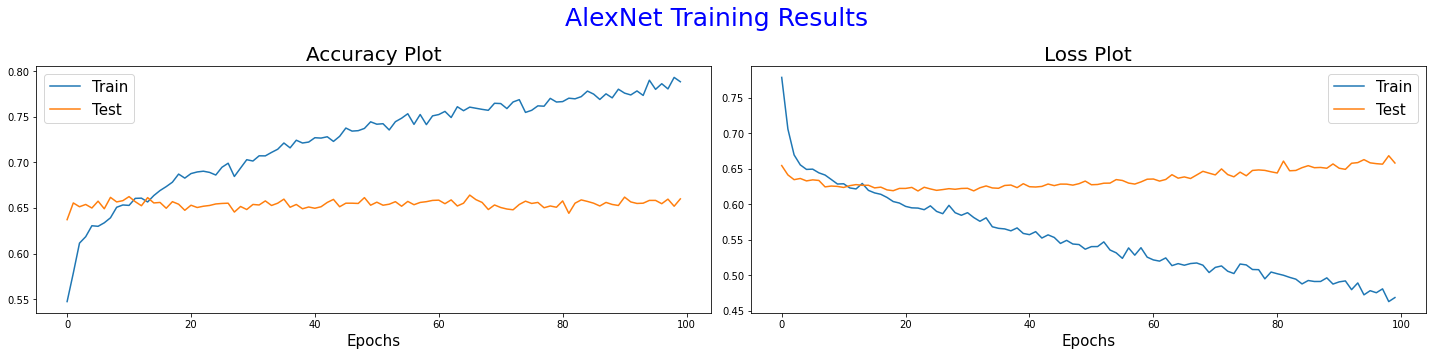

In [70]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].plot(accuracy_stats['train'])
ax[0].plot(accuracy_stats['val'])
ax[0].set_title('Accuracy Plot',fontsize=20)
ax[0].legend(['Train','Test'],fontsize=15)
ax[0].set_xlabel('Epochs',fontsize=15)
ax[1].plot(loss_stats['train'])
ax[1].plot(loss_stats['val'])
ax[1].set_title('Loss Plot',fontsize=20)
ax[1].legend(['Train','Test'],fontsize=15)
ax[1].set_xlabel('Epochs',fontsize=15)
plt.suptitle('AlexNet Training Results',fontsize=25,color='blue')
plt.tight_layout()
plt.show()

The above methodology is also done on several pretrained models which can be seen on a separate notebook entitled ML2-Preprocess_Pretrained NB due to the long codes and long running hours. For the succeeding parts we will just show the plot results for easier reference and explanation. This goes the same way with the computed training and test results. Please also supporting notebook for the accuracy, summary of accuracy will be listed down for this notebook.

### VGG16 Training Results

*Training Accuracy :84%*

*Test Accuracy : 64%*

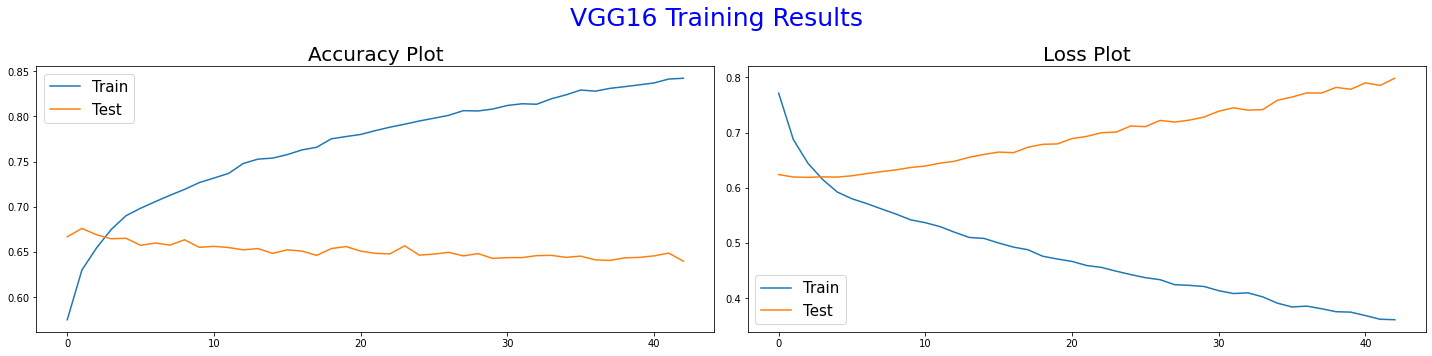

### VGG19 Training Results

*Training Accuracy :75%*

*Test Accuracy : 66%*

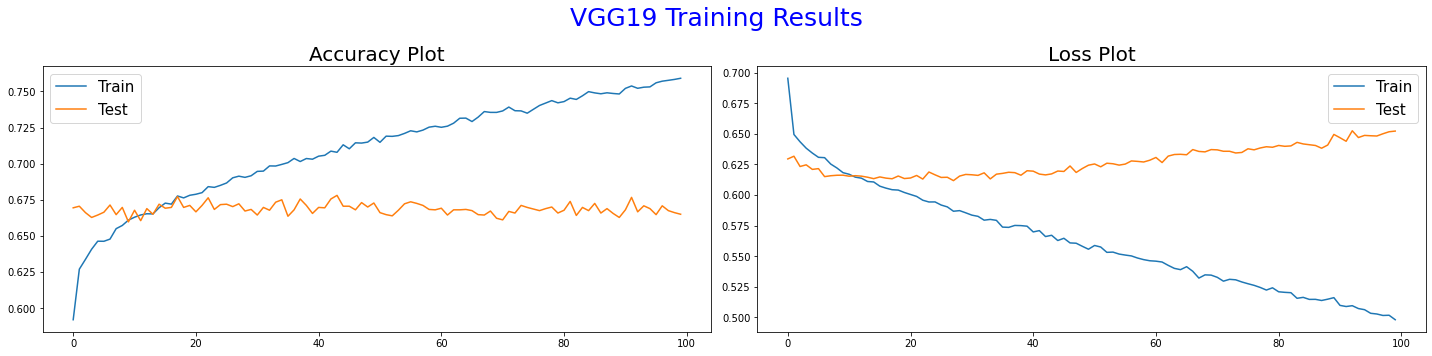

### MNASNET RESULTS

*Training Accuracy :50%*

*Test Accuracy : 51%*

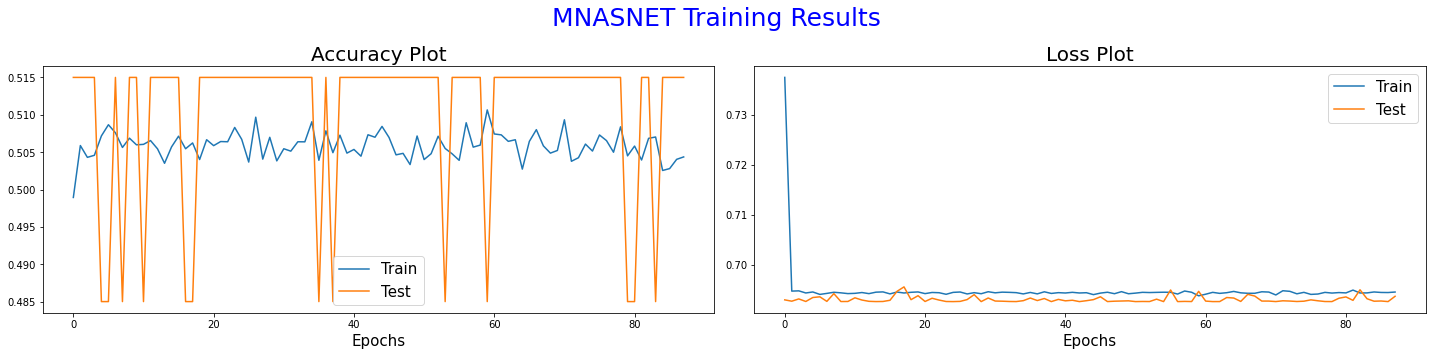

### DENSENET RESULTS

*Training Accuracy :63%*

*Test Accuracy : 62%*

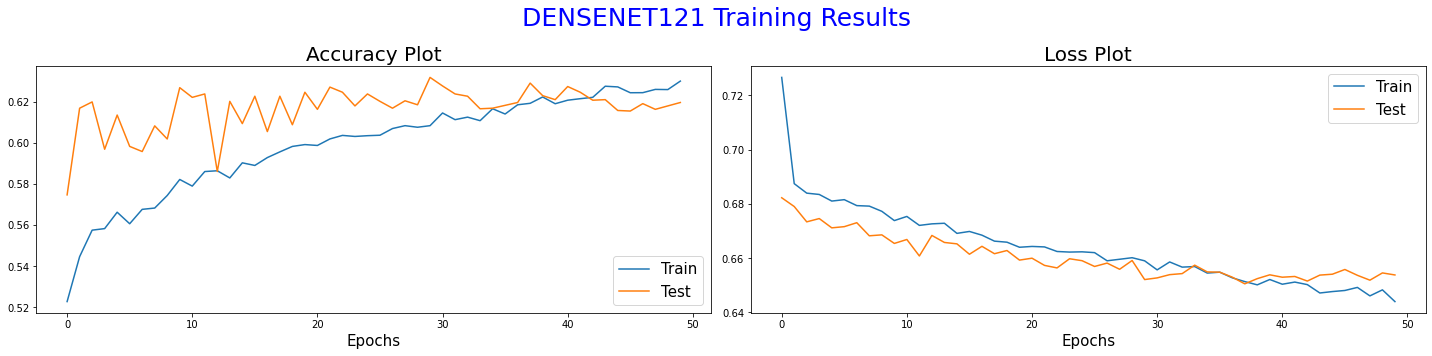


### SQUEEZENET RESULTS

*Training Accuracy :50%*

*Test Accuracy : 51%*

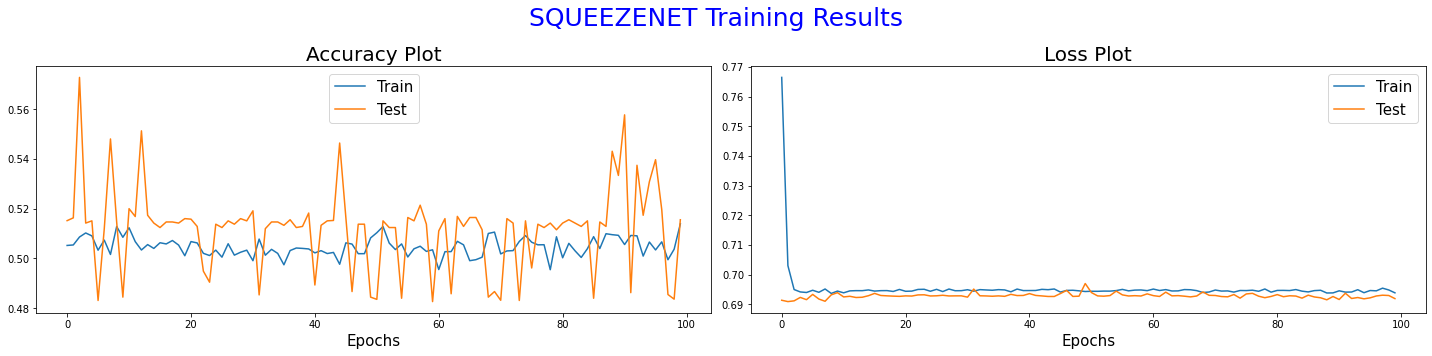

### SHUFFLENET RESULTS

*Training Accuracy :50%*

*Test Accuracy : 51%*

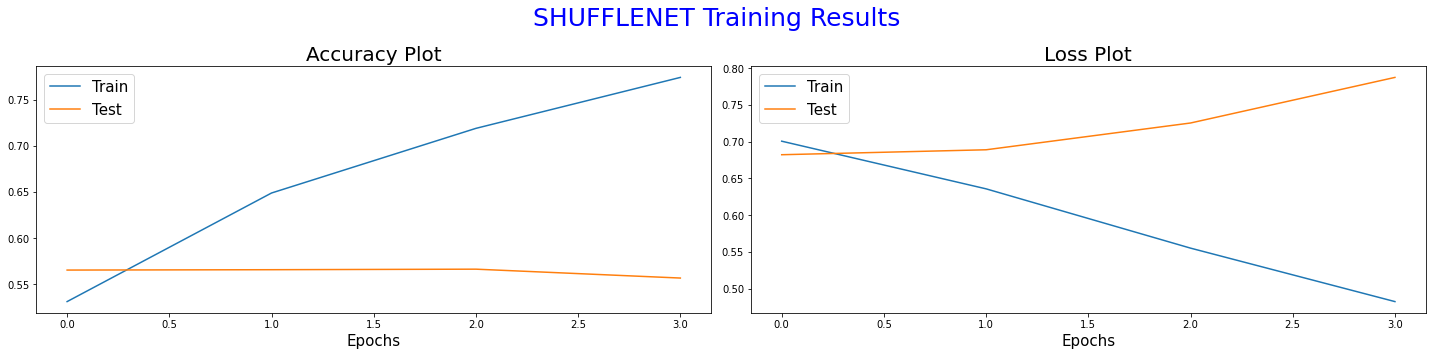

### MOBILENET RESULTS

*Training Accuracy :50%*

*Test Accuracy : 51%*

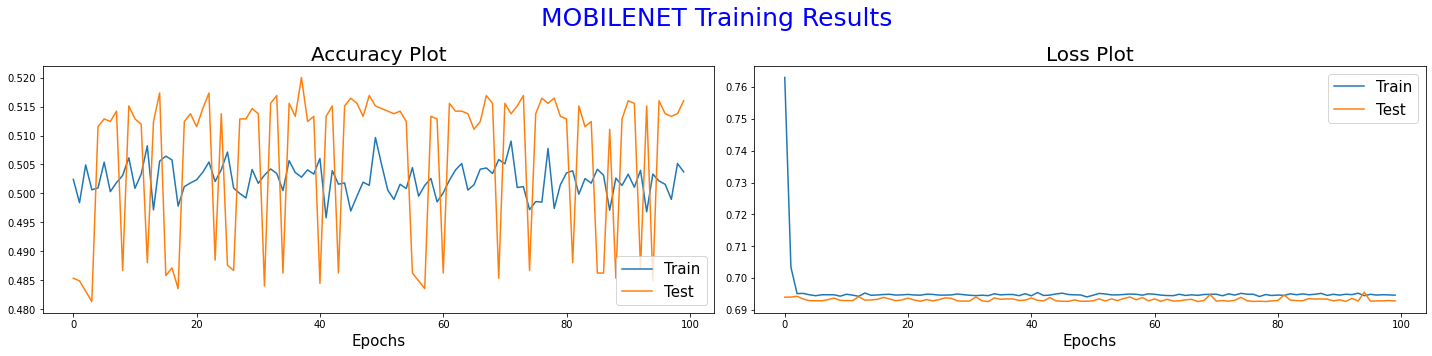

<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">SUMMARY: RESULTS AND DISCUSSION
    </span></div>

<p style="text-align: justify">Based on the results of the Fitting of the model, first we can see that the accuracies of each of the models is not that high. The maximum accuracy can be seen already on the VGG16 Models which is around 67% which above the 1.25 PCC Score which is around 62.5. This makes the model good and but can be further checked for more analysis. Overall, we can put a certain summary and observations on each of the Pre-Trained Models, and what is their behavior on this project. Observations on the Pre-trained Models and using Pytorch are as follows: </p>

**Observations on each Pretrained Models**

*VGG16 and VGG19*
    
    Out of the Models, Used, VGG Type models proves to be one of the best models to use for feature extraction. This model achieved the highest accuracy among the models by using the features extracted using its pre defined models and predefined weights.

*MNASNET*
    
        Based on the results, this model is one of the pretrained models that output features which will not converge rapidly. If you can see on the graph, the test and training accuracy is very low compared to the VGG16 and VGG19. This means that with enough time, MNASNET can generalize well for this model.
    
*DENSENET amd Alexnet*
    
        Just based on the name of the model, this model is longer to train and exhibits the same characteristics of VGG tpye models. Unlike the former, densenet is will take time before it overfits, unlike the VGG models which overfits faster.
    
*SQUEEZENET*
    
        The same with Mnasnet, this has a low accuracy which translate that the model doesn't generalize well.
    
*SHUFFLENET*
    
        This pretrained models is the worst amoung the models, it has the lowest accuracy and overfits very fast and very little epochs. It is advised to use this model only for very very large dataset.
        
*MOBILENET*
     
         This model has the same characteristics with MNASNET and SHUFFLENET.
    

**Observations Using Pytorch Libary**


1. Several Other Classifications Metrics are easier to implement using Pytorch Rather than Keras. Since it is triggered by creating your own for loop, you can use different sklearn metrics to easily see if the models is doing its required predicting or if the model is already overfitting.


2. Pytorch has its own array types like long tensor and float tensor and it is more difficult to understand at first if comparing to Tensorflow Keras Library. Unlike Keras which is automated, Pytorch actually needs to create a for loop to trigger the forward loop and backward loop propagation.


3. Pytorch has many transformation metrics that are really usuable for data augmentation. This can be used to create a larger training dataset so the model can generalize well.


4. Pytorch in some way harder to implement since there array input are different in order compared to the normal techniques of machine learning which is coupled to keras. But in some way, Pytorch is more understandable when coded manually specially for creation of models.


5. Keras also has a chance to not generalize well when using the validation split so it is easier to do it in pytorch since you can already create your split on your own desired for loop code.

**For this study I was able to come up, with some highlights:**


1. Different Pre-Trained Models has different values of features extraction, some models would be very beneficial to the problem, some might not predict as good as others. It is important to check the output of each pre-trained models to understand the importance of each value predicted.


2. Data Augmentation is very important specially for small datasets. I was able to improve accuracy of at least 5-10% when i augmented my data from an initial 8k images to 110k images.


3. Different Random Preprocessing is also important to the dataset to generalize well. There are many useful preprocessing on the pytorch library which can be used to make sure the dataset can predict a


4. Usage of the activation functions are very important to the system, a simple changing of relu activation to tanh activation function, was able to increase the accuracy to at least 2-3% which is already significant.

<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">RECOMMENDATION</span></div>

There are some recommendations suggested to further improve the study:

1.	Further preprocessing of the output of the pretrained models is suggested. PCA or SVD analysis can be done also to further check the important of each feature.


2.  The Resulting Parameters can be used with the data from machine learning 1 to be able to have a general model that can predict the price of the condominium.

<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">REFERENCES</span></div>

[1] https://pytorch.org/docs/stable/torchvision/models.html